<a href="https://colab.research.google.com/github/Tran-Thu-Le/ttlblog/blob/main/math/ellipse/ellipse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ellipsoid problems

In this note, we shall investigate the structures of ellipse with Python experiments.

## Equation of ellipse

In the plane $Oxy$ the equation of an ellipse is very simple
$$\frac{x^2}{a^2}+\frac{y^2}{b^2}=1.$$

Thus, it is possible to parameterize it by angle $t\in [0, 2\pi]$ such that
$$\begin{cases}
x=a\cos(t),\\
y=b\sin(t).
\end{cases}
$$

We can therefore exploit this formula to plot the ellipse. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
from math import pi 

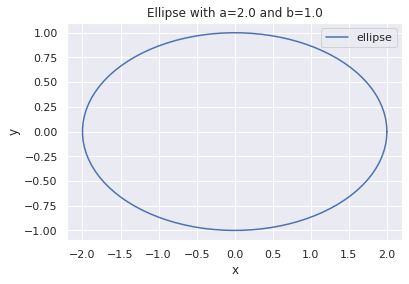

In [12]:
def plot_ellipse():
    a, b = 2., 1.
    t = 2*pi*np.linspace(0., 1., 100)
    x = a*np.cos(t)
    y = b*np.sin(t)
    plt.plot(x, y, label="ellipse")
    plt.legend()
    plt.title(f"Ellipse with a={a} and b={b}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

plot_ellipse()

To work with n-dim ellipses, it is necessary to rewrite the ellipsoid equation interm of matrix and vectors.

In general, every n-dim ellipse can be rewritten as follows
$$\langle x-c, P^{-1} (x-c)\rangle=1$$
where $P$ is a [positive definite matrix][1], i.e. there exist $D$ and $U$ such that
$$P=UDU^T$$
where
- $D$ is a diagonal matrix with positive values on its diagonal. These values are also the eigenvalue of $P$.
- $U$ is a (unitary) matrix such that $U^T=U^{-1}$. Each column of $U$ is a eigenvector.

We also have
- $P^{-1} = UD^{-1}U^T$
- $P^{-1/2}=UD^{-1/2}U^T$

**Thus, we can think of ellipse as a tranformation of a sphere.** Indeed,
$$\langle x-c, P^{-1} (x-c)\rangle=1=\langle P^{-1/2}U^T(x-c), P^{-1/2}U^T(x-c)\rangle$$
Let $y=P^{-1/2}U^T(x-c)$, then the ellipsoid equation is equivalent to 
$$||y||_2^2=1$$
this is exactly the equation of cetered sphere.

Now, observe that
$x=UP^{1/2}y+c$. Let
- $x_1 = P^{1/2}y$ is a coordinate scalling of $y$,
- $x_2 = Ux_1$ is a rotation of $x_1$,
- $x = x_2+c$ is a translation of $x_2$.

Hence, ellipse is indeed a tranformation of a sphere, inwhich the coordination scalling playing the most importatnt role since it is the only step changing the shape of ellipse.

[1]: https://en.wikipedia.org/wiki/Definite_matrix

Let us have a look at the following example, where we contruct the ellipse by scalling the x-axis of a sphere (circle).

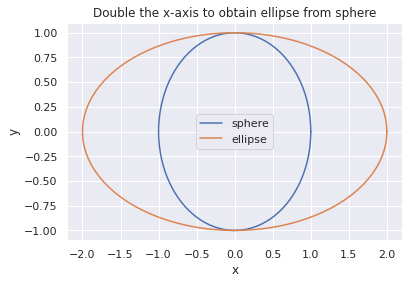

In [10]:
def plot_ellipse_2():
    # sphere
    t = 2*pi*np.linspace(0., 1., 100)
    x = np.cos(t)
    y = np.sin(t)
    plt.plot(x, y, label="sphere")

    # ellipse
    mat = np.array([[2., 0.], [0., 1.]])
    x2, y2 = mat @ np.vstack([x, y])
    plt.plot(x2, y2, label="ellipse")

    plt.legend()
    plt.title(f"Double the x-axis to obtain ellipse from sphere")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

plot_ellipse_2()

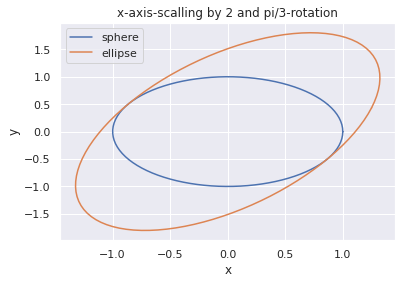

In [16]:
def plot_ellipse_3():
    # sphere
    t = 2*pi*np.linspace(0., 1., 100)
    x = np.cos(t)
    y = np.sin(t)
    plt.plot(x, y, label="sphere")

    # We now contruct matrix P for ellipse <x-c, P^{-1} (x-c)>=1
    D = np.array([[4., 0.], [0., 1.]])
    alpha = 2*pi/6
    U = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
    P = U @ D @ U.T
    Q = U @ np.sqrt(D) @ U.T

    # plot ellipse    
    x2, y2 = Q @ np.vstack([x, y])
    plt.plot(x2, y2, label="ellipse")

    # plotting parameters
    plt.legend()
    plt.title(f"x-axis-scalling by 2 and pi/3-rotation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

plot_ellipse_3()

## Tangent of ellipse

Consider an ellipse associated with positive definite matrix $P$ defined by
$$\langle x-c, P^{-1}(x-c)\rangle=1.$$

Then for $x_0$ belonging to this ellipse, the tangent plane at $x_0$ is defined by
$$\langle x-c, P^{-1}(x_0-c)\rangle=1.$$

**Note.** For a general point $g$, we may construct a point on the ellipse by using the following formula
$$x_0=\frac{g}{\sqrt{\langle g, P^{-1}g\rangle}}+c.$$

These claims can be proved very easy by applying transformations from ellipse to sphere and back.

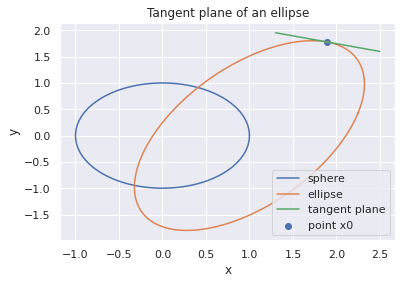

In [49]:
def plot_plane(g, level, xmin, xmax, label):
    g0 = g[0][0]
    g1 = g[1][0]
    
    a = (level - g0*xmin)/g1
    b = (level - g0*xmax)/g1
    plt.plot([xmin, xmax], [a, b], label=label)

def plot_ellipse_4():
    # unit sphere
    t = 2*pi*np.linspace(0., 1., 100)
    x = np.cos(t)
    y = np.sin(t)
    plt.plot(x, y, label="sphere")

    # We now contruct matrix P and center c for ellipse <x-c, P^{-1} (x-c)>=1
    D = np.array([[4., 0.], [0., 1.]])
    alpha = 2*pi/6
    U = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
    P = U @ D @ U.T
    Q = U @ np.sqrt(D) @ U.T 
    c = np.array([[1.], [0.]])

    # plot ellipse
    x2, y2 = Q @ np.vstack([x, y])
    plt.plot(x2+c[0], y2+c[1], label="ellipse") 

    # construct  and plot tangent point
    g = np.array([[1.], [2.]])
    G = g / np.sqrt((g * (np.linalg.inv(P) @ g)).sum())  
    # plt.plot([0., g[0][0]], [0., g[1][0]], label="point g")
    plt.scatter(G[0]+c[0], G[1]+c[1], label="point x0")

    # plot tangent plane
    g = np.linalg.inv(P) @ G
    level = 1 + ( g * c).sum()
    plot_plane(g, level, xmin=1.3, xmax=2.5, label="tangent plane")

    # adding parameters
    plt.legend()
    plt.title(f"Tangent plane of an ellipse")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

plot_ellipse_4()

## Cut ellipse by plane

Now, we are interested in the smallest-volume ellipse such that it contains intersection of the ellipse
$$\langle x-c, P^{-1} (x-c)\rangle \leq 1$$
and the half-space
$$\langle g, x\rangle \leq \gamma.$$

The new ellipe will have center
$$c_2 = c - \delta_1 g'$$
and matrix
$$P_2 = \delta_2 ( P - \delta_3 g' g'^{T}).$$

where
$$
g'=\frac{Pg}{\sqrt{\langle g, Pg\rangle}}\\
\alpha = \frac{\langle g, c\rangle -\gamma}{\sqrt{\langle g, Pg\rangle}}\\
\delta_1 = \frac{1+\alpha m}{m+1}\\
\delta_2 = \frac{m^2(1-\alpha^2)}{m^2-1}\\
\delta_3 = \frac{2(1+\alpha m)}{(m+1)(1+\alpha)}$$
$m$ is the dimension of space (i.e. $c\in \mathbb R^m$).

**Note.** The intersection is non-empty iff $|\alpha|\leq 1$.
This formula can be found in [the paper of Liang and Kristiaan][2]. The proof of smallestness can be found in [ Appendix B of the survey of Robert et. al.][3].


[2]: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6334263&casa_token=uAL2K9VUc1kAAAAA:J8BzJJuzQ7nKjJ0YyqbIYfgJ3jvKcu0asYg9dtmuuXyUMwiUrYYs_-4G_aphg3TsVcz0sSBdSoY&tag=1
[3]: https://pubsonline.informs.org/doi/pdf/10.1287/opre.29.6.1039?hits=10&FIRSTINDEX=0&searchid=1&author1=bland&resourcetype=HWCIT&RESULTFORMAT=&sortspec=relevance&maxtoshow=


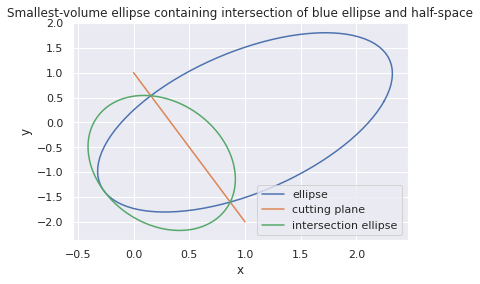

In [50]:
def plot_ellipe_5():
    # unit sphere
    t = 2*pi*np.linspace(0., 1., 100)
    x0 = np.cos(t)
    y0 = np.sin(t)
    # plt.plot(x, y, label="sphere")

    # We now contruct matrix P and center c for ellipse <x-c, P^{-1} (x-c)>=1
    D = np.array([[4., 0.], [0., 1.]])
    alpha = 2*pi/6
    U = np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])
    P = U @ D @ U.T
    Q = U @ np.sqrt(D) @ U.T 
    c = np.array([[1.], [0.]])

    # plot ellipse
    x, y = Q @ np.vstack([x0, y0])
    plt.plot(x+c[0], y+c[1], label="ellipse") 

    # g and gamma 
    g = np.array([[3.], [1.]])
    gamma=1.
    plot_plane(g, gamma, xmin=0., xmax=1., label="cutting plane")

    # intersection ellipse
    g_norm = np.sqrt( (g * (P @ g)).sum() )
    h =  (g * c).sum()-gamma
    alpha = h/g_norm 
    m = 2
    if np.abs(alpha)<=1.:
        g_bar = g/g_norm 
        g_mat = P @ g_bar
        delta_1 = (1+alpha*m)/(m+1)
        delta_2 = (m**2*(1-alpha**2))/(m**2-1)
        delta_3 = (2*(1+alpha*m))/((m+1)*(1+alpha))
        c2 = c - delta_1 * g_mat
        P2 = delta_2*(P - delta_3 * g_mat * g_mat.T)

    # plot intersection ellipse
    eigs, vecs = np.linalg.eig(P2)
    P2_sqrt = vecs @ np.diag(np.sqrt(eigs)) @ vecs.T
    x2, y2 = P2_sqrt @ np.vstack([x0, y0])
    plt.plot(c2[0]+x2, c2[1]+y2, label="intersection ellipse")

    # adding parameters
    plt.legend()
    plt.title(f"Smallest-volume ellipse containing intersection of blue ellipse and half-space")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

plot_ellipe_5()